In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")
from scipy import stats

ImportError: cannot import name 'chi2_contingency' from 'scipy' (c:\Users\tikom\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\__init__.py)

In [19]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')

header = ['ID', 'Гендер', 'Возраст', 'Гипертония', 'Сердечная болезнь',
           'Был ли в браке', 'Тип работы', 'Тип местности проживания',
             'Средний Уровень Глюкозы', 'ИМТ', 'Статус курения', 'Инсульт']
data.columns= header
data

,ID,Гендер,Возраст,Гипертония,Сердечная болезнь,Был ли в браке,Тип работы,Тип местности проживания,Средний Уровень Глюкозы,ИМТ,Статус курения,Инсульт
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.drop(columns=['ID'], inplace=True)

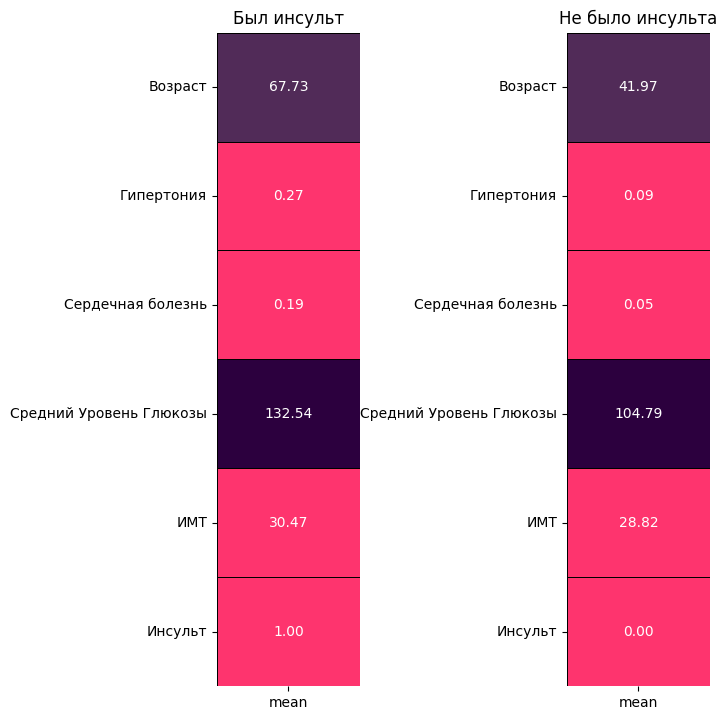

In [ ]:
stroke = data[data['Инсульт'] == 1].describe().T
no_stroke = data[data['Инсульт'] == 0].describe().T

colors = ['#fe346e','#512b58','#2c003e']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (7,7))
plt.subplot(1,2,1)
sb.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Был инсульт')

plt.subplot(1,2,2)
sb.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Не было инсульта')

fig.tight_layout(pad = 0)

In [ ]:
# Заполнить пропущенные значения: средними значениями
data['ИМТ'].replace(np.nan, data['ИМТ'].mean(), inplace=True)


In [ ]:
print(set(data['Статус курения']))

{'never smoked', 'formerly smoked', 'Unknown', 'smokes'}


In [ ]:
data.isnull().sum()

Гендер                      0
Возраст                     0
Гипертония                  0
Сердечная болезнь           0
Был ли в браке              0
Тип работы                  0
Тип местности проживания    0
Средний Уровень Глюкозы     0
ИМТ                         0
Статус курения              0
Инсульт                     0
dtype: int64

In [ ]:
data.dtypes

Гендер                       object
Возраст                     float64
Гипертония                    int64
Сердечная болезнь             int64
Был ли в браке               object
Тип работы                   object
Тип местности проживания     object
Средний Уровень Глюкозы     float64
ИМТ                         float64
Статус курения               object
Инсульт                       int64
dtype: object

In [ ]:
data.describe()

,Возраст,Гипертония,Сердечная болезнь,Средний Уровень Глюкозы,ИМТ,Инсульт
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894560,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


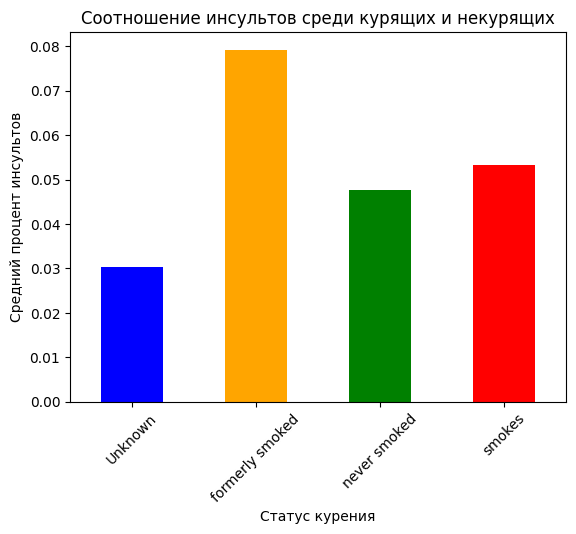

In [22]:
smoking_stroke = data.groupby('Статус курения')['Инсульт'].mean()
smoking_stroke.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Соотношение инсультов среди курящих и некурящих')
plt.xlabel('Статус курения')
plt.ylabel('Средний процент инсультов')
plt.xticks(rotation=45)
plt.show()

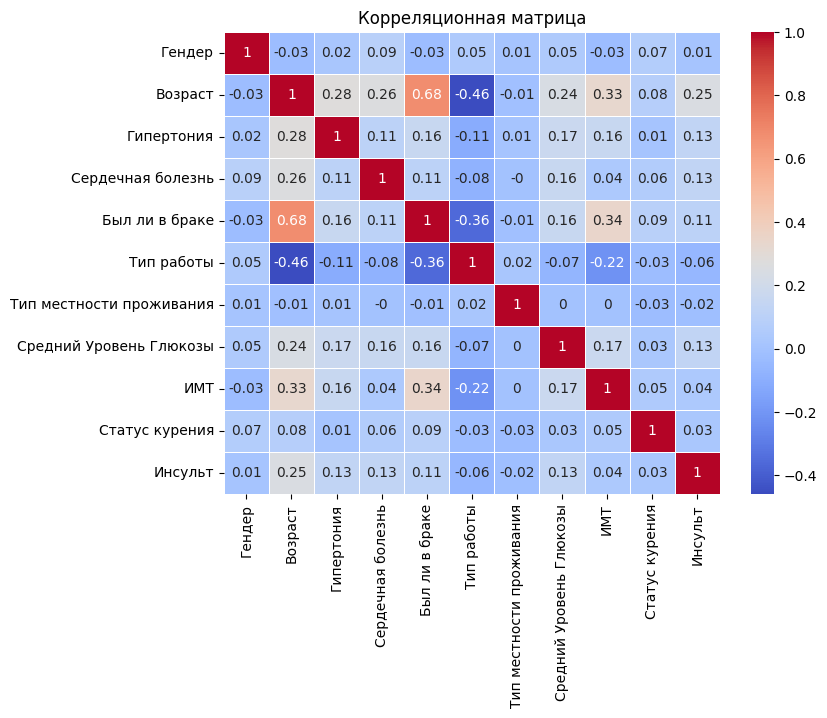

In [ ]:
data['Гендер'] = data['Гендер'].replace({'Male': 1, 'Female': 0})
data['Был ли в браке'] = data['Был ли в браке'].replace({'Yes': 1, 'No': 0})
data['Тип местности проживания'] = data['Тип местности проживания'].replace({'Rural': 1, 'Urban': 0})
data['Тип работы'] = data['Тип работы'].replace({'Self-employed': 1, 'Govt_job': 0, 'Never_worked':2, 'Private':3, 'children':4})
data['Статус курения'] = data['Статус курения'].replace({'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3})


data = data.fillna(data.mean())
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(8, 6))  # Размер графика
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Добавьте название графика
plt.title('Корреляционная матрица')

# Отобразите график
plt.show()



#123

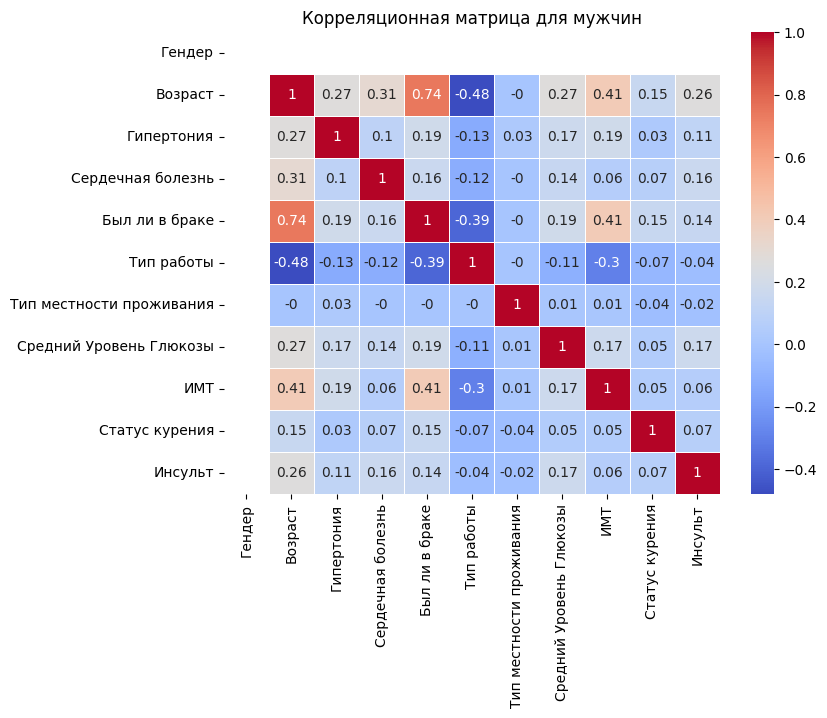

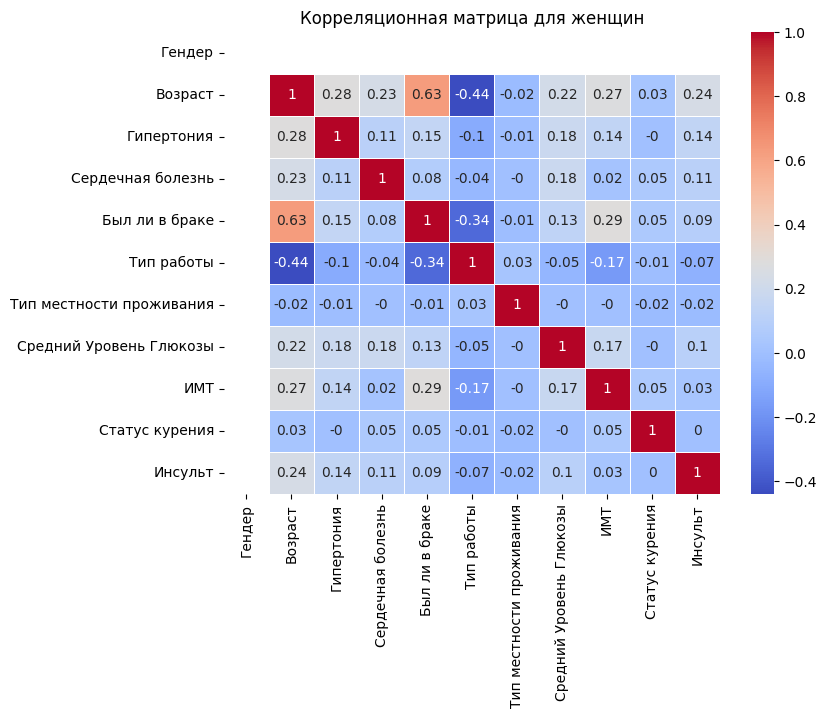

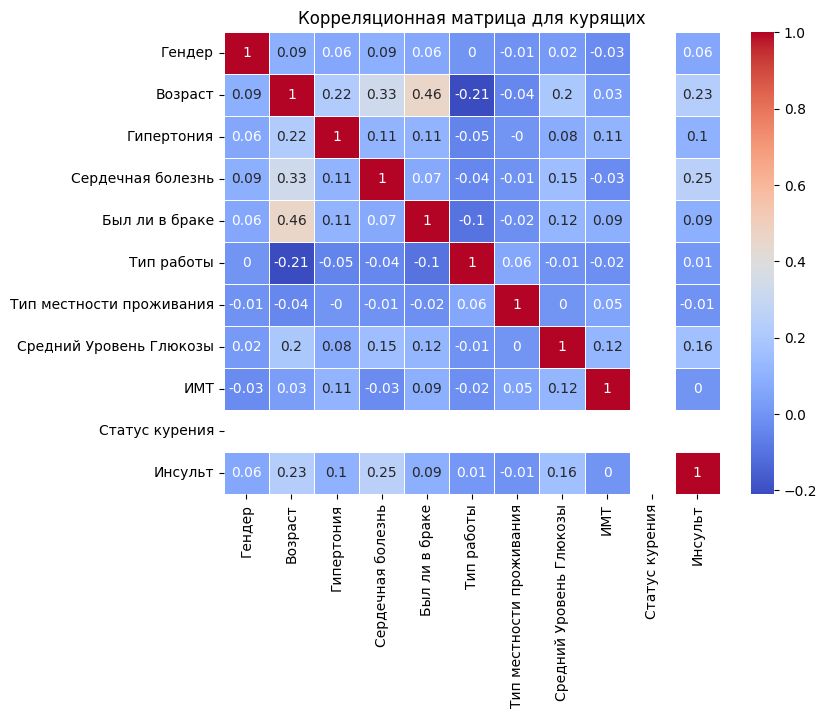

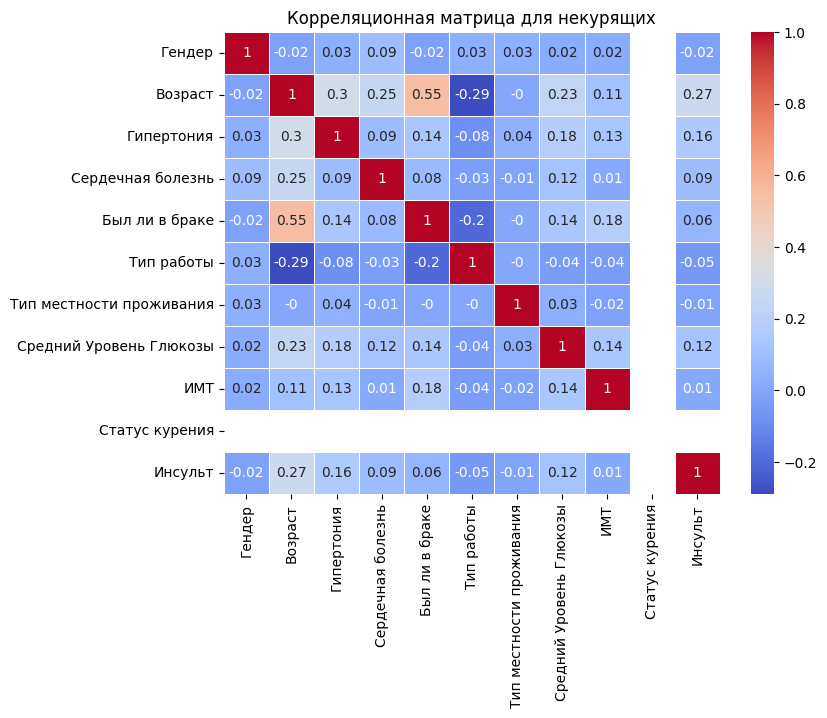

In [ ]:
male_data = data[data['Гендер'] == 1]  # Выберите только мужчин
female_data = data[data['Гендер'] == 0]  # Выберите только женщин
smoker_data = data[data['Статус курения'] == 3]  # Выберите только курящих
non_smoker_data = data[data['Статус курения'] == 0]  # Выберите только некурящих
# average_level_glukoza_data = data[data['Средний Уровень Глюкозы']]

male_correlation_matrix = male_data.corr().round(2)
female_correlation_matrix = female_data.corr().round(2)
smoker_correlation_matrix = smoker_data.corr().round(2)
non_smoker_correlation_matrix = non_smoker_data.corr().round(2)
# glukoza_coorelation_matrix = average_level_glukoza_data.corr().round(2)

plt.figure(figsize=(8, 6))
sb.heatmap(male_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для мужчин')
plt.show()

# Для женщин
plt.figure(figsize=(8, 6))
sb.heatmap(female_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для женщин')
plt.show()

# Для курящих
plt.figure(figsize=(8, 6))
sb.heatmap(smoker_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для курящих')
plt.show()

# Для некурящих
plt.figure(figsize=(8, 6))
sb.heatmap(non_smoker_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для некурящих')
plt.show()


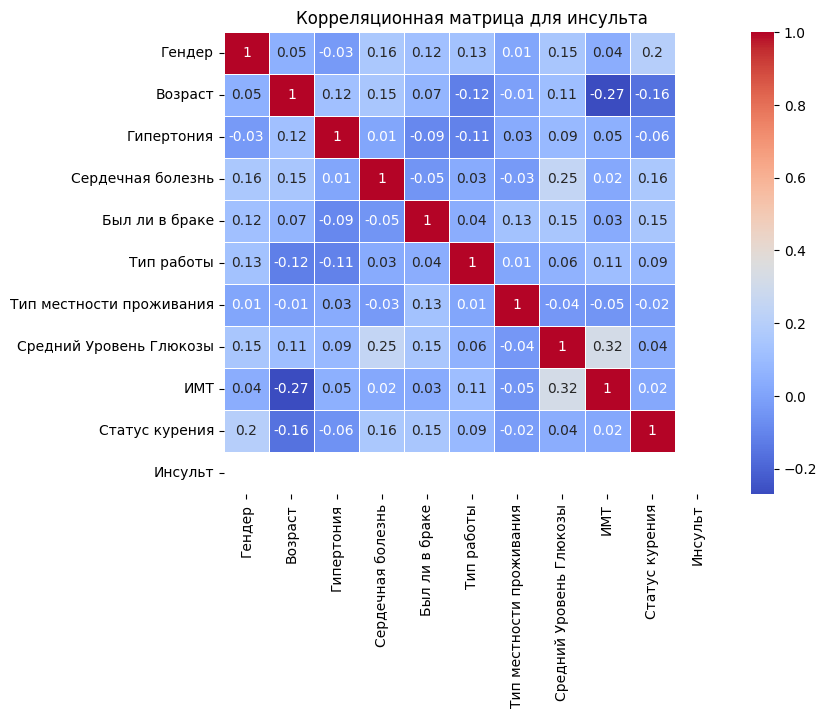

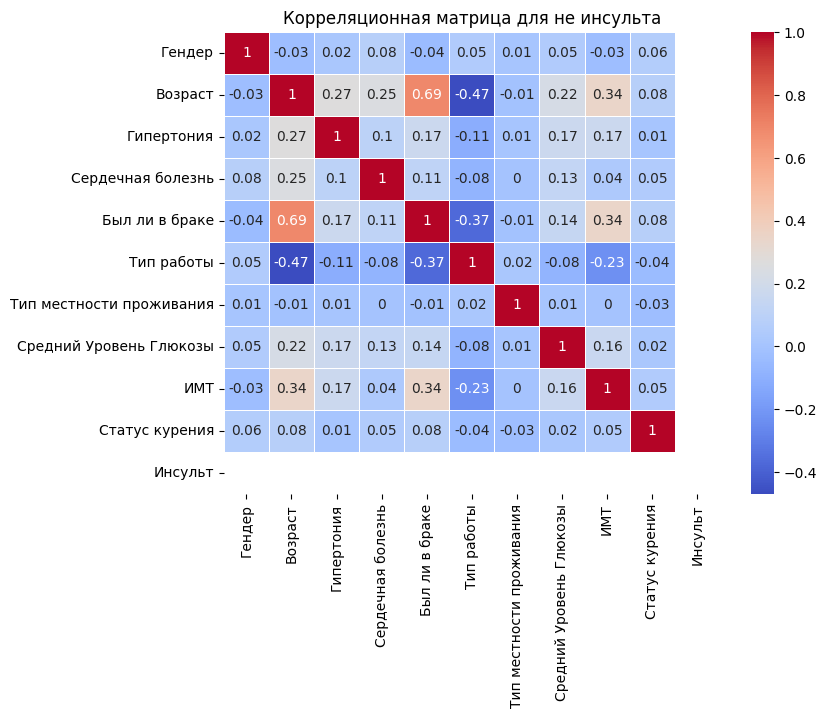

In [ ]:
stroke_happend = data[data['Инсульт'] == 1]  
stroke_not_happend = data[data['Инсульт'] == 0]  

stroke_happend_corr = stroke_happend.corr().round(2)
stroke_not_happend_corr = stroke_not_happend.corr().round(2)

plt.figure(figsize=(8, 6))
sb.heatmap(stroke_happend_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для инсульта')
plt.show()

plt.figure(figsize=(8, 6))
sb.heatmap(stroke_not_happend_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для тех, у кого не было инсульта')
plt.show()

In [16]:
cross_tab = pd.crosstab(data['Статус курения'], data['Инсульт'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# Вывод результатов
print(f"Значение χ²: {chi2}")
print(f"p-value: {p}")
print(f"Степени свободы: {dof}")
print("Ожидаемые значения:")
print(expected)



Значение χ²: 29.225727075498273
p-value: 2.0077041756108283e-06
Степени свободы: 3
Ожидаемые значения:
[[1799.78860834   92.21139166]
 [1468.749266     75.250734  ]
 [ 840.91603053   43.08396947]
 [ 750.54609513   38.45390487]]
